In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm
import sys
sys.path.append("../")
import environment

import gym
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
from stable_baselines3 import PPO

In [12]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**2

In [13]:
env = gym.make('SQLstruct-v1')

In [14]:
dqn_model = DQN('MlpPolicy', env, verbose=1, batch_size = 64) 

Using cpu device
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env in a DummyVecEnv.


In [15]:
dqn_model.learn(total_timesteps=10**5)
dqn_model.save('ignore_simulb64_')

In [16]:
import evaluate_models as ev

rewards, num_steps = ev.test_episodes(dqn_model, env, num_episodes=1000, max_steps = 100)
len(rewards), len(num_steps)

(1000, 1000)

(1000, 1000)

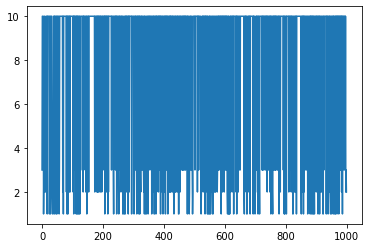

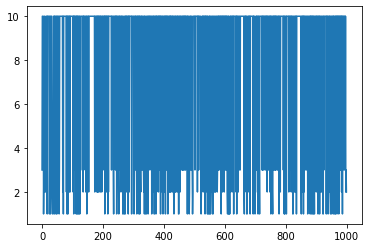

In [17]:
plt.plot(num_steps)

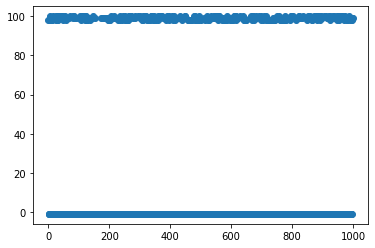

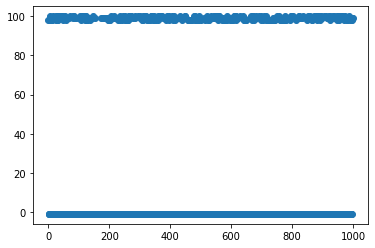

In [18]:
plt.plot(rewards, "o")

In [19]:
dqn_models = [DQN('MlpPolicy', env, verbose=(i==-1), batch_size = 64) 
              for i in range(n_simulations)]

In [ ]:
for i in tqdm(range(n_simulations)):
    dqn_models[i].learn(total_timesteps=10**6)
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    dqn_models[i].save('ignore_'+ str(i) + '_simulb64_'+timestamp)

 20%|███████████████▊                                                               | 2/10 [49:37<3:18:25, 1488.21s/it]

In [ ]:
rewards = []
num_steps = []
for i in tqdm(range(n_simulations)):
    reward, num_step = ev.test_episodes(dqn_models[i], env, num_episodes=1000, max_steps = 50)
    
    num_steps.append(np.array(num_step))
    rewards.append(np.array(reward))

In [ ]:
for i in range(n_simulations):
    plt.figure()
    plt.plot(num_steps, "o")
    plt.title(str(i))
plt.show()

In [ ]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_b64_test1.png")